In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas_datareader as pdr
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras_preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf


Przydatne linki do pracy: 

1. LSTM Model
https://www.youtube.com/watch?v=UbvkhuqVqUI&t=217s

2. EDA dla Time Series
https://www.youtube.com/watch?v=3sH1kisAK9s

3. EDA dla Times Series inny tutorial
https://www.youtube.com/watch?v=W-YCKMNTcqE

EDA of time series

In [95]:
df = pd.read_excel("Walmart_clusters.xlsx")
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,yyyy,mm,dd,week_relative,week_absolute,Date,cluster_sklearn
0,3,377219,0,65.065,3.234,216.539,7.567,2010,1,1,52,53,2010-01-01,0
1,5,309443,0,61.722,3.234,213.766,6.639,2010,1,1,52,53,2010-01-01,0
2,7,669225,0,27.723,3.179,191.968,8.873,2010,1,1,52,53,2010-01-01,0
3,9,494392,0,59.275,3.234,216.770,6.476,2010,1,1,52,53,2010-01-01,0
4,15,576183,0,37.713,3.600,133.786,7.900,2010,1,1,52,53,2010-01-01,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6594 entries, 0 to 6593
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Store            6594 non-null   int64         
 1   Weekly_Sales     6594 non-null   int64         
 2   Holiday_Flag     6594 non-null   int64         
 3   Temperature      6594 non-null   float64       
 4   Fuel_Price       6594 non-null   float64       
 5   CPI              6594 non-null   float64       
 6   Unemployment     6594 non-null   float64       
 7   yyyy             6594 non-null   int64         
 8   mm               6594 non-null   int64         
 9   dd               6594 non-null   int64         
 10  week_relative    6594 non-null   int64         
 11  week_absolute    6594 non-null   int64         
 12  Date             6594 non-null   datetime64[ns]
 13  cluster_sklearn  6594 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(

In [5]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  6594
Columns:  14


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,yyyy,mm,dd,week_relative,week_absolute,cluster_sklearn
count,6594.000000,6.594000e+03,6594.000000,6594.000000,6594.000000,6594.000000,6594.000000,6594.000000,6594.000000,6594.000000,6594.000000,6594.000000,6594.000000
mean,23.642857,1.022780e+06,0.044586,61.200675,3.379514,170.359148,7.989549,2010.993631,6.560510,15.414013,78.006369,26.668790,0.977707
std,12.589350,5.653747e+05,0.206409,17.258363,0.468031,39.238288,1.919389,0.817833,3.453936,8.902864,45.335545,15.109413,0.912668
min,2.000000,2.135380e+05,0.000000,5.540000,2.472000,126.077000,3.879000,2010.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,13.000000,5.351042e+05,0.000000,49.758750,2.934250,131.127000,6.866000,2010.000000,4.000000,7.000000,39.000000,14.000000,0.000000
50%,23.500000,9.415050e+05,0.000000,62.606000,3.493000,162.292500,7.896000,2011.000000,7.000000,16.000000,78.000000,27.000000,1.000000
75%,34.000000,1.377112e+06,0.000000,74.200000,3.752000,211.585250,8.595000,2012.000000,10.000000,23.000000,117.000000,40.000000,2.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.233000,14.313000,2012.000000,12.000000,31.000000,157.000000,53.000000,2.000000


In [96]:
df_indexed = df.set_index("Date")
class_0 = df_indexed[df_indexed["cluster_sklearn"] == 0]
class_0

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,yyyy,mm,dd,week_relative,week_absolute,cluster_sklearn
Date,,,,,,,,,,,,,
2010-01-01,3,377219,0,65.065,3.234,216.539,7.567,2010,1,1,52,53,0
2010-01-01,5,309443,0,61.722,3.234,213.766,6.639,2010,1,1,52,53,0
2010-01-01,7,669225,0,27.723,3.179,191.968,8.873,2010,1,1,52,53,0
2010-01-01,9,494392,0,59.275,3.234,216.770,6.476,2010,1,1,52,53,0
2010-01-01,15,576183,0,37.713,3.600,133.786,7.900,2010,1,1,52,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-28,38,437321,0,71.740,4.468,131.108,10.199,2012,12,28,157,52,0
2012-12-28,42,612380,0,76.030,4.468,131.108,6.943,2012,12,28,157,52,0
2012-12-28,43,619370,0,71.140,3.601,214.677,8.839,2012,12,28,157,52,0


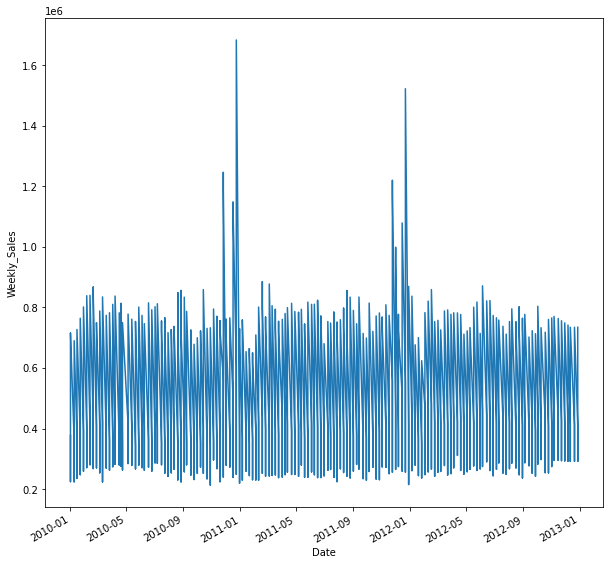

In [8]:
plt.figure(figsize=(10,10))
class_0["Weekly_Sales"].plot()
plt.ylabel("Weekly_Sales")
plt.xlabel("Date")
pass

In [9]:
fig = px.line(df, x="Date", y="Weekly_Sales", title="Weekly_Sales with Slider")

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [10]:
fig = px.line(df, x="Date", y="Weekly_Sales", title="Weekly_Sales with Slider")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [11]:
class_0.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'yyyy', 'mm', 'dd', 'week_relative',
       'week_absolute', 'cluster_sklearn'],
      dtype='object')

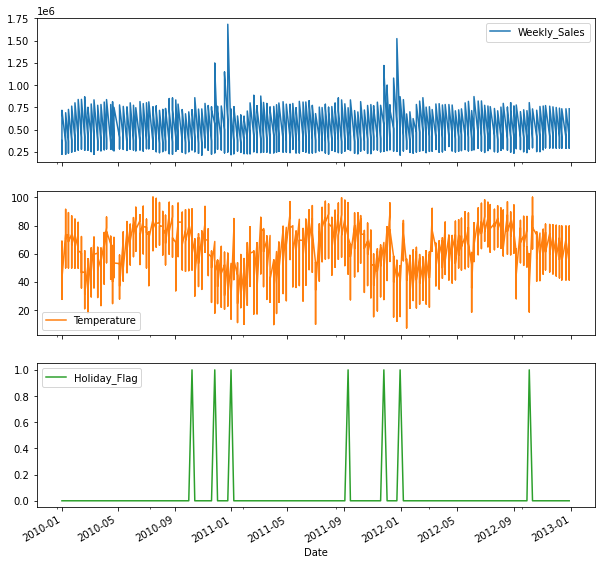

In [12]:
future_check = class_0[["Weekly_Sales", "Temperature", 'Holiday_Flag']]
future_check.plot(figsize=(10,10), subplots=True)
pass

Wybór lat do wykresu

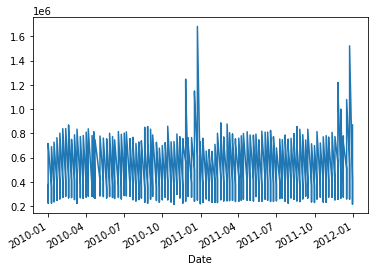

In [13]:
class_0["2010":"2011"]["Weekly_Sales"].plot()
pass

In [14]:
correlation_matrix = np.round(class_0.corr(),2)

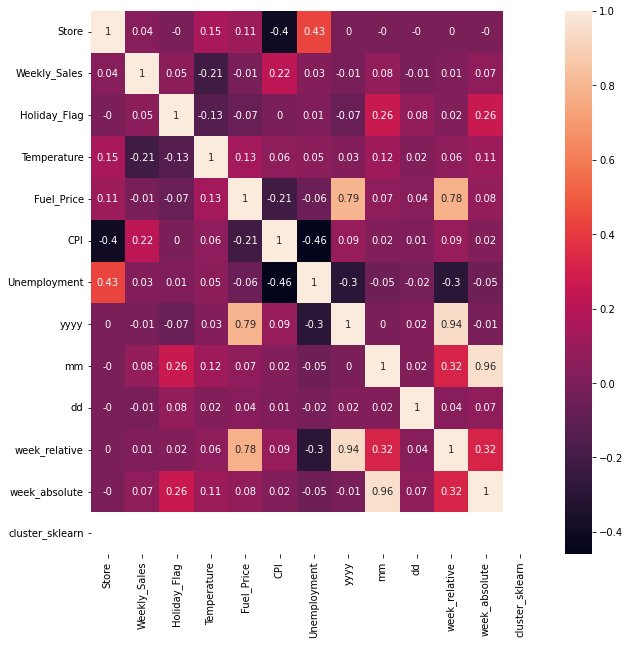

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True)
pass

In [16]:
features = class_0.to_numpy().tolist()
target = class_0["Weekly_Sales"].to_list()

In [17]:
ts_generator = TimeseriesGenerator(features,target, length=10, sampling_rate=1, batch_size=1)

In [18]:
ts_generator[0]

(array([[[3.00000e+00, 3.77219e+05, 0.00000e+00, 6.50650e+01,
          3.23400e+00, 2.16539e+02, 7.56700e+00, 2.01000e+03,
          1.00000e+00, 1.00000e+00, 5.20000e+01, 5.30000e+01,
          0.00000e+00],
         [5.00000e+00, 3.09443e+05, 0.00000e+00, 6.17220e+01,
          3.23400e+00, 2.13766e+02, 6.63900e+00, 2.01000e+03,
          1.00000e+00, 1.00000e+00, 5.20000e+01, 5.30000e+01,
          0.00000e+00],
         [7.00000e+00, 6.69225e+05, 0.00000e+00, 2.77230e+01,
          3.17900e+00, 1.91968e+02, 8.87300e+00, 2.01000e+03,
          1.00000e+00, 1.00000e+00, 5.20000e+01, 5.30000e+01,
          0.00000e+00],
         [9.00000e+00, 4.94392e+05, 0.00000e+00, 5.92750e+01,
          3.23400e+00, 2.16770e+02, 6.47600e+00, 2.01000e+03,
          1.00000e+00, 1.00000e+00, 5.20000e+01, 5.30000e+01,
          0.00000e+00],
         [1.50000e+01, 5.76183e+05, 0.00000e+00, 3.77130e+01,
          3.60000e+00, 1.33786e+02, 7.90000e+00, 2.01000e+03,
          1.00000e+00, 1.00000e+00, 

Nowy model

In [19]:
class_0.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,yyyy,mm,dd,week_relative,week_absolute,cluster_sklearn
Date,,,,,,,,,,,,,
2010-01-01,3,377219,0,65.065,3.234,216.539,7.567,2010,1,1,52,53,0
2010-01-01,5,309443,0,61.722,3.234,213.766,6.639,2010,1,1,52,53,0
2010-01-01,7,669225,0,27.723,3.179,191.968,8.873,2010,1,1,52,53,0
2010-01-01,9,494392,0,59.275,3.234,216.770,6.476,2010,1,1,52,53,0
2010-01-01,15,576183,0,37.713,3.600,133.786,7.900,2010,1,1,52,53,0


In [97]:
class_0_futures = class_0[["Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]

In [21]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(class_0_futures)

In [22]:
data_scaled

array([[0.11139885, 0.        , 0.62154726, 0.38176353, 0.8942821 ,
        0.2791965 ],
       [0.06527151, 0.        , 0.58547691, 0.38176353, 0.86686899,
        0.1800406 ],
       [0.31013378, 0.        , 0.21863401, 0.35420842, 0.65138005,
        0.41874132],
       ...,
       [0.27620321, 0.        , 0.68709538, 0.56563126, 0.87587489,
        0.41510845],
       [0.08456814, 0.        , 0.51402676, 0.66382766, 0.04973506,
        0.02810129],
       [0.35453447, 0.        , 0.50722918, 0.76553106, 0.65492902,
        0.39673042]])

In [98]:
features = class_0_futures.drop(columns="Weekly_Sales")
target = class_0_futures["Weekly_Sales"]

In [24]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.11139885, 0.        , 0.62154726, 0.38176353, 0.8942821 ,
          0.2791965 ],
         [0.06527151, 0.        , 0.58547691, 0.38176353, 0.86686899,
          0.1800406 ]]]),
 array([0.31013378]))

In [99]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [100]:
X_train.shape

(2256, 5)

In [101]:
X_test.shape

(565, 5)

In [102]:
win_length_train = 2255
win_length_test = 564
batch_size = 189
num_features = 6

train_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(X_train, y_train, length=win_length_train, sampling_rate=1, batch_size=batch_size)
test_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(X_test, y_test, length=win_length_test, sampling_rate=1, batch_size=batch_size)

In [103]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length_train, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [104]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 2255, 128)         69120     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 2255, 128)         0         
                                                                 
 lstm_12 (LSTM)              (None, 2255, 128)         131584    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 2255, 128)         0         
                                                                 
 dropout_6 (Dropout)         (None, 2255, 128)         0         
                                                                 
 lstm_13 (LSTM)              (None, 2255, 128)         131584    
                                                                 
 dropout_7 (Dropout)         (None, 2255, 128)        

In [105]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=20,
                                                            mode="min")

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator, epochs=10,
                              validation_data=test_generator,
                              shuffle=False,
                              callbacks=[early_stopping])

Epoch 1/10


InvalidArgumentError: Graph execution error:

Specified a list with shape [?,6] from a tensor with shape [1,5]
	 [[{{node TensorArrayUnstack/TensorListFromTensor}}]]
	 [[sequential_4/lstm_11/PartitionedCall]] [Op:__inference_train_function_38846]

In [42]:
model.evaluate(test_generator, verbose=0)

[0.001991880591958761, 0.03849760815501213]

In [43]:
prediction = model.predict(test_generator)

1/1 [==============================] - 1s 1s/step


In [93]:
prediction

array([[[0.02457471],
        [0.04550049],
        [0.06690869],
        [0.09055199],
        [0.11331806],
        [0.13472345],
        [0.15418027],
        [0.17220174],
        [0.18969157],
        [0.20689319],
        [0.22315733],
        [0.23870985],
        [0.25404215],
        [0.26885924],
        [0.28137088],
        [0.29023248],
        [0.2971188 ],
        [0.30240527],
        [0.3066926 ],
        [0.31049353],
        [0.31441697],
        [0.3174552 ],
        [0.31932873],
        [0.32076883],
        [0.32151845],
        [0.32070893],
        [0.3190874 ],
        [0.31813133],
        [0.31770986],
        [0.3180917 ],
        [0.318294  ],
        [0.31955802],
        [0.3219682 ],
        [0.3247624 ],
        [0.32756186],
        [0.33042276],
        [0.3330974 ],
        [0.33531207],
        [0.33738628],
        [0.33965385],
        [0.3415659 ],
        [0.3434547 ],
        [0.3446337 ],
        [0.34528697],
        [0.34598166],
        [0

In [86]:
nx, nsamples, ny = prediction.shape
prediction2 = prediction.reshape((nsamples,nx*ny))

In [87]:
df_pred = pd.concat([pd.DataFrame(prediction2), pd.DataFrame(X_test[:,1:][win_length_test:])],axis=1)

In [91]:
rev_trans = scaler.inverse_transform(df_pred)